# Loan Bank Eligibility Prediction


## Introduction
This project focuses on building a classification model to predict the credit eligibility of clients using a dataset from a bank. The goal is to create a scoring system that evaluates the likelihood of repayment and assists in minimizing risk while maximizing profit.

### Objectives:
- Perform exploratory data analysis and preprocessing.
- Train multiple machine learning models and optimize them using hyperparameter tuning.
- Evaluate model performance and export the best-performing model for future use.


## Phase 1: Theoretical Exploration


### Cross-validation and Hyperparameter Tuning
- **Cross-validation** is a technique for assessing how well a model will generalize to an independent dataset.
- **Hyperparameter tuning** optimizes model parameters to improve performance.
    - **GridSearchCV**: Exhaustive search over a grid of hyperparameters.
    - **RandomizedSearchCV**: Random sampling of hyperparameter combinations.


In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import os
import matplotlib.pyplot as plt



## Phase 2: Data Exploration



1. **Loaded the Dataset**:
   - The loan dataset was read from the specified file location.

2. **Split the Data**:
   - The dataset was split into two parts:
     - **Training Data (80%)**: Used for building and training machine learning models.
     - **Testing Data (20%)**: Reserved for validating the model's performance.

3. **Saved the Splits**:
   - The training data was saved as `data_working.csv`.
   - The testing data was saved as `data_raw.csv`.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Correct file path
file_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\loan-data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Split the data
data_working, data_raw = train_test_split(data, test_size=0.2, random_state=42)

# Save the splits into two separate CSV files
data_working_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv'
data_raw_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_raw.csv'

data_working.to_csv(data_working_path, index=False)
data_raw.to_csv(data_raw_path, index=False)

print(f"Data saved:\nWorking Data: {data_working_path}\nRaw Data: {data_raw_path}")


Data saved:
Working Data: C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv
Raw Data: C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_raw.csv


### Load the csv and first observations

In [3]:

# path to the working data CSV
working_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv'

# Load the working data
data_working = pd.read_csv(working_data_path)

# Explore the data
print("General Information:")
print(data_working.info())

print("\nMissing Values:")
print(data_working.isnull().sum())

print("\nDescriptive Statistics:")
print(data_working.describe())


General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            784 non-null    object 
 1   Gender             766 non-null    object 
 2   Married            781 non-null    object 
 3   Dependents         764 non-null    object 
 4   Education          784 non-null    object 
 5   Self_Employed      739 non-null    object 
 6   ApplicantIncome    784 non-null    int64  
 7   CoapplicantIncome  784 non-null    float64
 8   LoanAmount         761 non-null    float64
 9   Loan_Amount_Term   769 non-null    float64
 10  Credit_History     726 non-null    float64
 11  Property_Area      784 non-null    object 
 12  Loan_Status        489 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 79.8+ KB
None

Missing Values:
Loan_ID                0
Gender                18
Married            

# Dataset Observations 

## Dataset Overview
- **Total Rows:** 784
- **Total Columns:** 13
- **Data Types:**
  - **Numeric Columns (5):** `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`.
  - **Categorical Columns (8):** `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status`.
- **Target Variable:** `Loan_Status` (indicates loan approval).

---

## Key Observations

### Missing Values:
- `Gender`: 18 missing.
- `Married`: 3 missing.
- `Dependents`: 20 missing.
- `Self_Employed`: 45 missing.
- `LoanAmount`: 23 missing.
- `Loan_Amount_Term`: 15 missing.
- `Credit_History`: 58 missing.
- `Loan_Status` (Target Variable): 295 missing.

### Data Imbalance:
- **Categorical Features:**
  - `Credit_History`: Dominated by `1.0` values.
  - `Property_Area`: Needs further analysis to check for imbalance.
- **Target Variable:** `Loan_Status` has missing values, which will affect supervised learning.

### Column Details:
- **Numerical Columns:**
  - `ApplicantIncome`, `CoapplicantIncome`: No missing values but may require scaling.
  - `LoanAmount`: Contains 23 missing values and may have a skewed distribution.
  - `Loan_Amount_Term`: Contains 15 missing values.
  - `Credit_History`: Contains 58 missing values, mostly populated by `1.0`.
- **Categorical Columns:**
  - Features like `Gender`, `Married`, `Self_Employed`, and `Property_Area` have missing values that need imputation.
  - Encoding will be required for machine learning.

---

## Next Steps

1. **Handle Missing Values:**
   - Use appropriate imputation strategies for categorical and numerical columns.
   - Address missing values in `Loan_Status` (target variable) by either excluding rows or imputing based on patterns.

2. **Analyze Feature Distributions:**
   - Visualize distributions of numerical features (`ApplicantIncome`, `LoanAmount`, etc.) to identify skewness or outliers.
   - Check class distributions for categorical features to detect imbalances.

3. **Preprocessing:**
   - Normalize or standardize numerical columns to ensure consistent scaling.
   - Encode categorical columns to prepare for model training.
   - Consider feature engineering, such as creating new features (e.g., combining incomes).

4. **EDA Visualization:**
   - Visualize relationships between features and `Loan_Status` using plots.
   - Use bar plots to explore how categorical variables relate to `Loan_Status`.

5. **Train-Test Split:**
   - Ensure the dataset is cleaned and preprocessed before splitting into training and testing subsets.


In [4]:

# Check for unique values and missing values
unique_values = data_working.nunique()
low_unique_columns = unique_values[unique_values <= 1]
missing_percentage = (data_working.isnull().sum() / len(data_working)) * 100
high_missing_columns = missing_percentage[missing_percentage > 50]

# Display results
print("Columns with very low unique values:")
print(low_unique_columns)

print("\nColumns with high percentage of missing values:")
print(high_missing_columns)


Columns with very low unique values:
Series([], dtype: int64)

Columns with high percentage of missing values:
Series([], dtype: float64)


### Columns with Very Low Unique Values:

No columns have a single unique value or very low variability. This means all columns potentially contribute some variation to the dataset and might be relevant for analysis.
Columns with High Percentage of Missing Values:

No columns have more than 50% missing values. This suggests that all columns contain enough data to be included in the analysis with appropriate imputation for missing value

### Visualize missing values

C:\Users\khrib\AppData\Local\Temp\ipykernel_5952\3584083997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


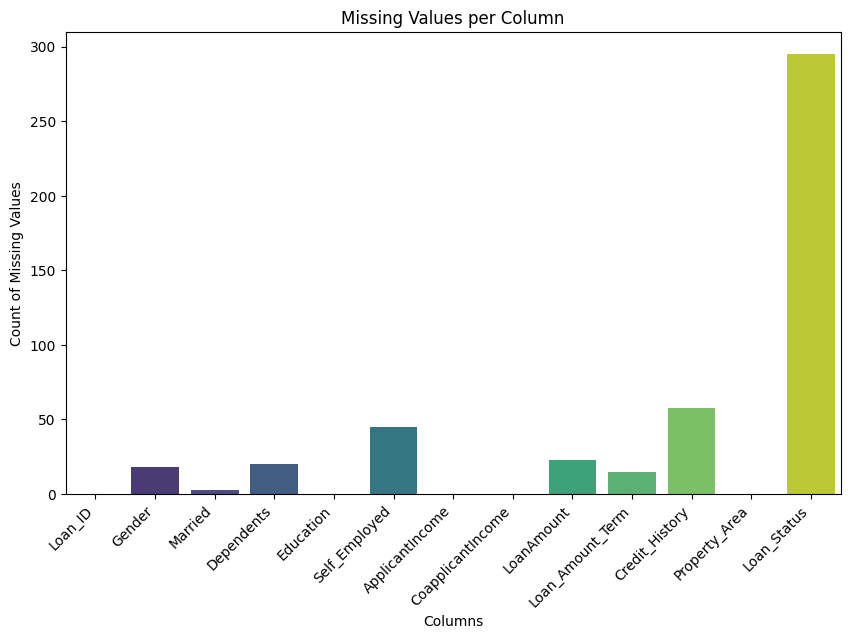

Missing Value Percentage:



(None,
 Loan_ID               0.000000
 Gender                2.295918
 Married               0.382653
 Dependents            2.551020
 Education             0.000000
 Self_Employed         5.739796
 ApplicantIncome       0.000000
 CoapplicantIncome     0.000000
 LoanAmount            2.933673
 Loan_Amount_Term      1.913265
 Credit_History        7.397959
 Property_Area         0.000000
 Loan_Status          37.627551
 dtype: float64)

In [5]:
plt.figure(figsize=(10, 6))
missing_values = data_working.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()

# Display missing value percentages
missing_percentage = (data_working.isnull().sum() / len(data_working)) * 100
print("Missing Value Percentage:\n"), missing_percentage

### Separate Numerical and Categorical Columns

In [6]:
# Separate categorical and numerical columns
categorical_columns = data_working.select_dtypes(include=['object']).columns
numerical_columns = data_working.select_dtypes(include=['int64', 'float64']).columns

# Display columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


### Explore Categorical Columns

In [7]:
print("Categorical Columns Exploration:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data_working[col].value_counts(dropna=False))
    print(f"Missing Values: {data_working[col].isnull().sum()} ({(data_working[col].isnull().mean() * 100):.2f}%)")


Categorical Columns Exploration:

Column: Loan_ID
Loan_ID
LP001350    1
LP002969    1
LP001082    1
LP002774    1
LP001098    1
           ..
LP001742    1
LP002086    1
LP002755    1
LP002530    1
LP001211    1
Name: count, Length: 784, dtype: int64
Missing Values: 0 (0.00%)

Column: Gender
Gender
Male      622
Female    144
NaN        18
Name: count, dtype: int64
Missing Values: 18 (2.30%)

Column: Married
Married
Yes    509
No     272
NaN      3
Name: count, dtype: int64
Missing Values: 3 (0.38%)

Column: Dependents
Dependents
0      427
2      138
1      123
3+      76
NaN     20
Name: count, dtype: int64
Missing Values: 20 (2.55%)

Column: Education
Education
Graduate        613
Not Graduate    171
Name: count, dtype: int64
Missing Values: 0 (0.00%)

Column: Self_Employed
Self_Employed
No     645
Yes     94
NaN     45
Name: count, dtype: int64
Missing Values: 45 (5.74%)

Column: Property_Area
Property_Area
Urban        281
Semiurban    271
Rural        232
Name: count, dtype: int6

### Explore Numerical Columns

In [8]:
print("\nNumerical Columns Exploration:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(data_working[col].describe())
    print(f"Missing Values: {data_working[col].isnull().sum()} ({(data_working[col].isnull().mean() * 100):.2f}%)")



Numerical Columns Exploration:

Column: ApplicantIncome
count      784.000000
mean      5325.243622
std       6192.326967
min          0.000000
25%       2849.500000
50%       3810.000000
75%       5669.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64
Missing Values: 0 (0.00%)

Column: CoapplicantIncome
count      784.000000
mean      1619.170816
std       2939.614697
min          0.000000
25%          0.000000
50%       1012.000000
75%       2330.750000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
Missing Values: 0 (0.00%)

Column: LoanAmount
count    761.000000
mean     144.060447
std       83.206301
min        9.000000
25%      100.000000
50%      125.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64
Missing Values: 23 (2.93%)

Column: Loan_Amount_Term
count    769.000000
mean     341.659298
std       66.728332
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Lo

### Visualization of Key Relationships

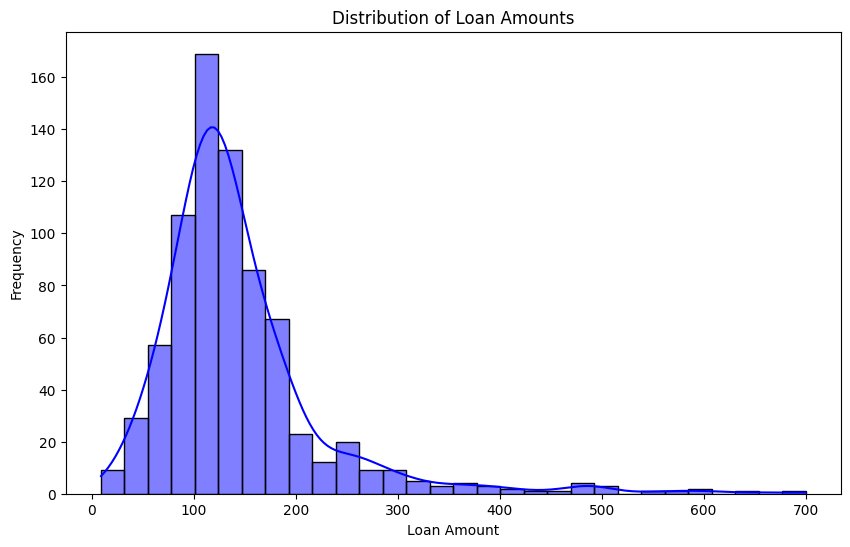

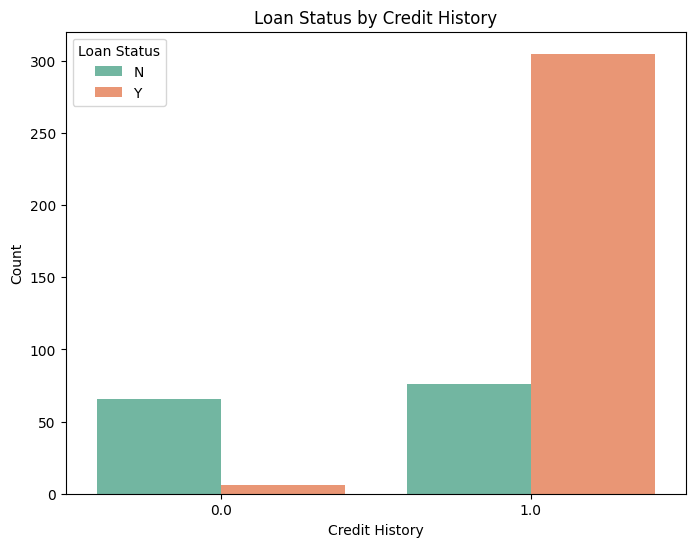

In [9]:
# Example: LoanAmount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_working['LoanAmount'], kde=True, bins=30, color="blue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Example: Credit History vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x="Credit_History", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


 ### Categorical Variable Distributions

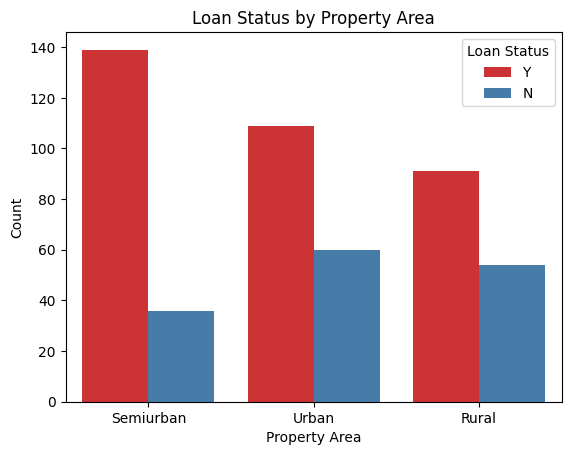

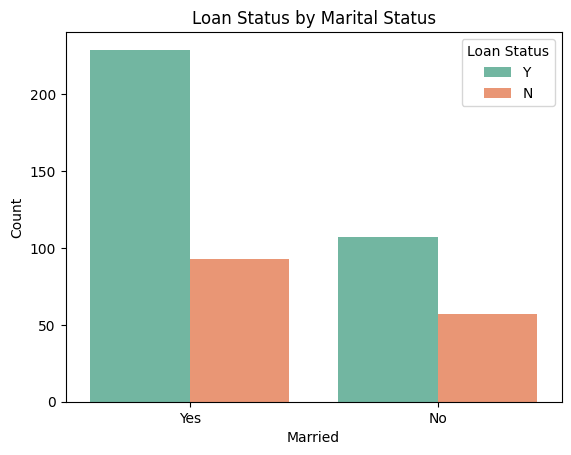

In [10]:
# Property Area vs Loan Status
sns.countplot(x="Property_Area", hue="Loan_Status", data=data_working, palette="Set1")
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Married vs Loan Status
sns.countplot(x="Married", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


### Numerical Distributions

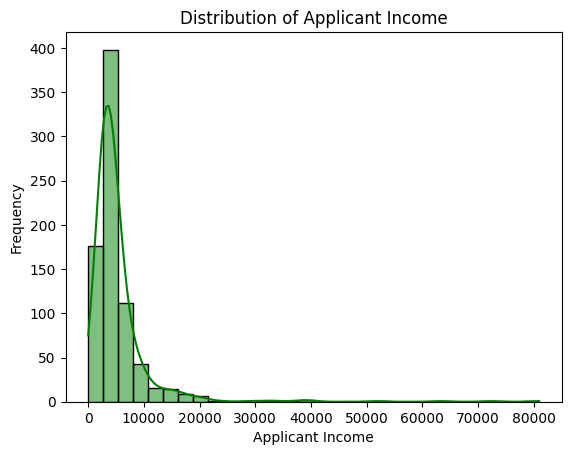

C:\Users\khrib\AppData\Local\Temp\ipykernel_5952\2102964183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="LoanAmount", data=data_working, palette="Set3")


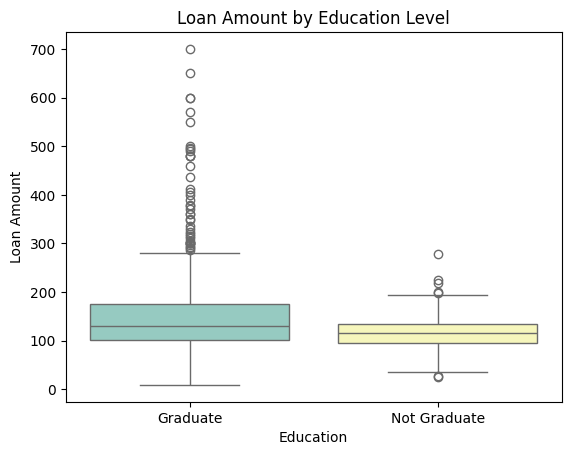

In [11]:
# Distribution of Applicant Income
sns.histplot(data_working['ApplicantIncome'], kde=True, bins=30, color="green")
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

# Loan Amount by Education
sns.boxplot(x="Education", y="LoanAmount", data=data_working, palette="Set3")
plt.title("Loan Amount by Education Level")
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()


### Target Variable Analysis

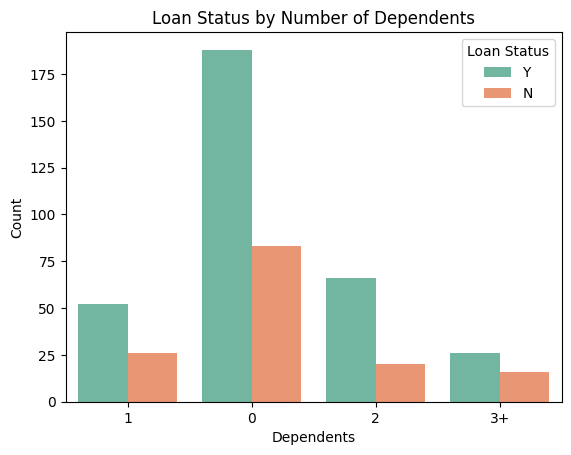

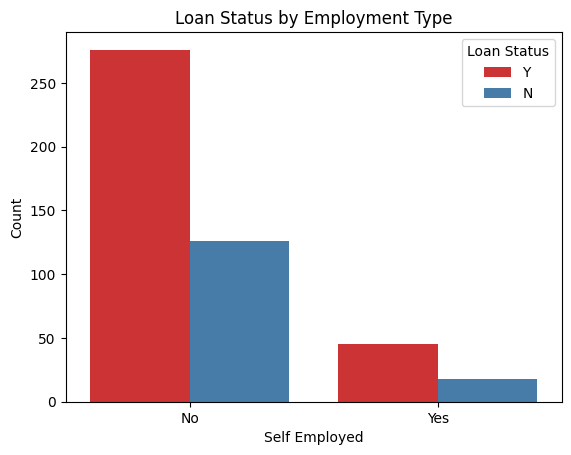

In [12]:
# Dependents vs Loan Status
sns.countplot(x="Dependents", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Number of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Self Employed vs Loan Status
sns.countplot(x="Self_Employed", hue="Loan_Status", data=data_working, palette="Set1")
plt.title("Loan Status by Employment Type")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


### Observations after viz
#### From Categorical Columns
Loan_ID:

Unique for every entry, does not contribute to prediction. Recommendation: Drop this column.
Gender:

Some missing values (~2.3%).
Dominated by "Male". Recommendation: Impute missing values with the mode ("Male").
Married:

Missing values observed (~0.38%).
Strong impact on Loan_Status from the visualization. Recommendation: Impute with the mode ("Yes").
Dependents:

Missing values (~2.55%).
Loan approvals differ based on dependency levels. Recommendation: Impute missing values and analyze as an important feature.
Self_Employed:

Missing values (~5.73%).
Majority "No". Loan approvals vary between employed/self-employed. Recommendation: Impute with the mode ("No").
Property_Area:

Significant impact on Loan_Status. Recommendation: Keep as is, no missing values.
Loan_Status:

Target variable, but has missing values (~37.62%).
Recommendation: Handle missing values carefully. Missing rows may need removal since imputation might introduce bias.

#### From Numerical Columns

ApplicantIncome:

High variance, with outliers (maximum value is much higher than 75th percentile).
Skewed distribution. Recommendation: Normalize or apply log transformation.
CoapplicantIncome:

Many entries have 0.0. Potential cases of single applicants.
Skewed data. Recommendation: Combine with ApplicantIncome to create TotalIncome for better representation.
LoanAmount:

Missing values (~2.93%).
Outliers are present. Recommendation: Impute missing values using the median and apply scaling or log transformation.
Loan_Amount_Term:

Missing values (~1.91%).
Majority (~360 months). Recommendation: Impute missing values with the mode (360).
Credit_History:

Missing values (~7.40%).
Strong correlation with Loan_Status. Recommendation: Impute missing values with mode (1.0) as it strongly affects approvals.

### Steps to Take based on observations

#### 1. Data Cleaning

Drop Loan_ID: It does not provide predictive power.
Impute Missing Values:
Categorical Columns:
Gender: Mode.
Married: Mode.
Dependents: Mode.
Self_Employed: Mode.
Credit_History: Mode.
Numerical Columns:
LoanAmount: Median.
Loan_Amount_Term: Mode.

#### 2. Feature Engineering

Combine Income Columns:
Create TotalIncome = ApplicantIncome + CoapplicantIncome.
Transformations:
Apply log transformation to TotalIncome and LoanAmount to reduce skewness.

#### 3. Visualize Key Relationships

Explore:
Correlation heatmap to identify significant features.
Relationships between TotalIncome, LoanAmount, and Loan_Status.

#### 4. Prepare Data for Modeling

Normalize or standardize numerical features.
Encode categorical variables using one-hot encoding or label encoding.

#### 5. Handle Outliers

Use visualization (boxplots, histograms) to detect and address outliers in numerical features.


## Phase 3: Data Preprocessing

### Data Cleaning :involves dropping irrelevant columns and imputing missing values.

In [13]:

# Step 2: Drop the `Loan_ID` column
data_cleaned = data_working.drop(columns=['Loan_ID'])

# Step 3: Impute missing values for categorical columns
categorical_imputations = {
    'Gender': data_cleaned['Gender'].mode()[0],
    'Married': data_cleaned['Married'].mode()[0],
    'Dependents': data_cleaned['Dependents'].mode()[0],
    'Self_Employed': data_cleaned['Self_Employed'].mode()[0],
    'Credit_History': data_cleaned['Credit_History'].mode()[0],
}
data_cleaned.fillna(value=categorical_imputations, inplace=True)

# Step 4: Impute missing values for numerical columns
data_cleaned['LoanAmount'].fillna(data_cleaned['LoanAmount'].median(), inplace=True)
data_cleaned['Loan_Amount_Term'].fillna(data_cleaned['Loan_Amount_Term'].mode()[0], inplace=True)

# Step 5: Drop rows where `Loan_Status` is missing and map `Loan_Status` to binary values
data_cleaned = data_cleaned.dropna(subset=['Loan_Status'])  # Remove rows with missing `Loan_Status`
data_cleaned['Loan_Status'] = data_cleaned['Loan_Status'].map({'Y': 1, 'N': 0})  # Map 'Y' to 1 and 'N' to 0

# Step 6: Display summary of cleaned data
print("Data Cleaning and Loan_Status Adjustment Completed. Summary:")
print(data_cleaned.info())


Data Cleaning and Loan_Status Adjustment Completed. Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 3 to 783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             489 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         489 non-null    object 
 3   Education          489 non-null    object 
 4   Self_Employed      489 non-null    object 
 5   ApplicantIncome    489 non-null    int64  
 6   CoapplicantIncome  489 non-null    float64
 7   LoanAmount         489 non-null    float64
 8   Loan_Amount_Term   489 non-null    float64
 9   Credit_History     489 non-null    float64
 10  Property_Area      489 non-null    object 
 11  Loan_Status        489 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 49.7+ KB
None


C:\Users\khrib\AppData\Local\Temp\ipykernel_5952\553165565.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['LoanAmount'].fillna(data_cleaned['LoanAmount'].median(), inplace=True)
C:\Users\khrib\AppData\Local\Temp\ipykernel_5952\553165565.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

### Feature Engineering :Combine incomes and apply transformations to reduce skewness.

In [14]:

# Create `TotalIncome` as the sum of `ApplicantIncome` and `CoapplicantIncome`
data_cleaned['TotalIncome'] = data_cleaned['ApplicantIncome'] + data_cleaned['CoapplicantIncome']

# Apply log transformation to reduce skewness
import numpy as np
data_cleaned['Log_TotalIncome'] = np.log1p(data_cleaned['TotalIncome'])  # log1p to handle zeros safely
data_cleaned['Log_LoanAmount'] = np.log1p(data_cleaned['LoanAmount'])

# Display the transformed features
print(data_cleaned[['TotalIncome', 'Log_TotalIncome', 'Log_LoanAmount']].head())


   TotalIncome  Log_TotalIncome  Log_LoanAmount
3       5167.0         8.550241        4.744932
4       3167.0         8.060856        4.317488
6       6033.0         8.705165        5.081404
8      17263.0         9.756379        5.420535
9       3463.0         8.150179        4.812184


### Visualize Key Relationships

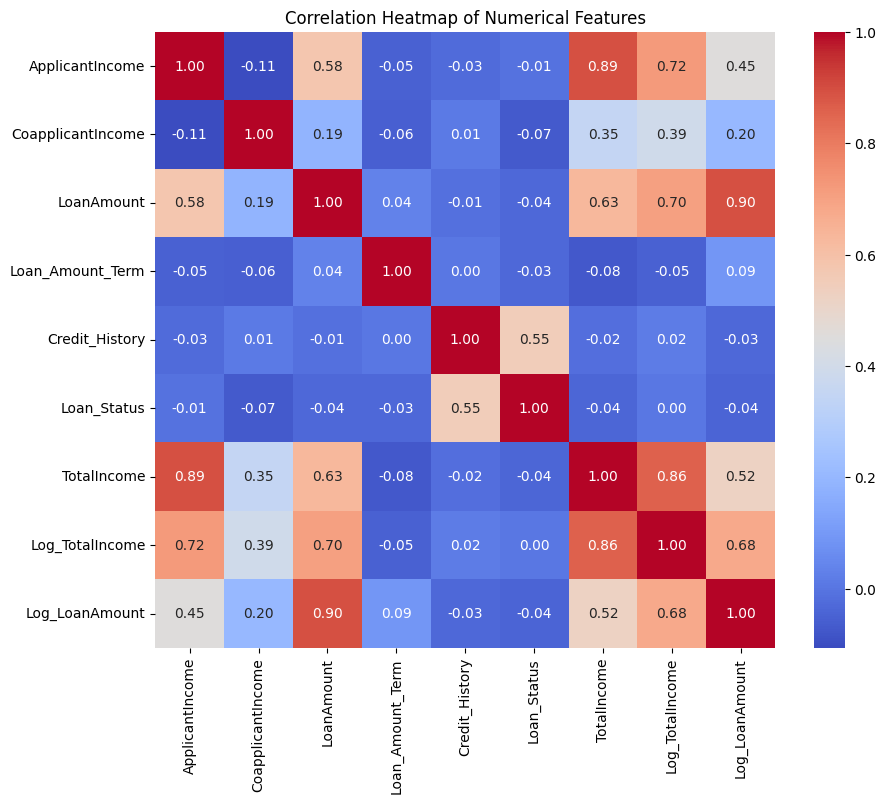

In [15]:
# Step 3: Visualize Key Relationships 
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



### Prepare Data for Modeling 
Normalize or standardize numerical features and encode categorical variables.

In [16]:
# Step 4: Prepare Data for Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
data_cleaned[['Normalized_TotalIncome', 'Normalized_LoanAmount']] = scaler.fit_transform(
    data_cleaned[['TotalIncome', 'LoanAmount']]
)

# Encode categorical variables using LabelEncoder
label_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in label_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

# Display the prepared data
print("Data Prepared for Modeling:")
print(data_cleaned.head())


Data Prepared for Modeling:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
3       1        1           0          0              0             3500   
4       1        0           0          0              0             3167   
6       1        1           0          1              0             6033   
8       0        0           0          1              1            17263   
9       0        0           0          0              1             3463   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
3             1667.0       114.0             360.0             1.0   
4                0.0        74.0             360.0             1.0   
6                0.0       160.0             360.0             1.0   
8                0.0       225.0             360.0             1.0   
9                0.0       122.0             360.0             1.0   

   Property_Area  Loan_Status  TotalIncome  Log_TotalIncome  Log_LoanAmount  \
3        

### Step 5: Handle Outliers

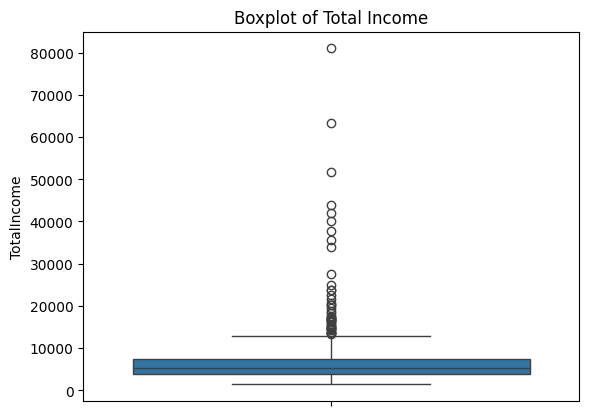

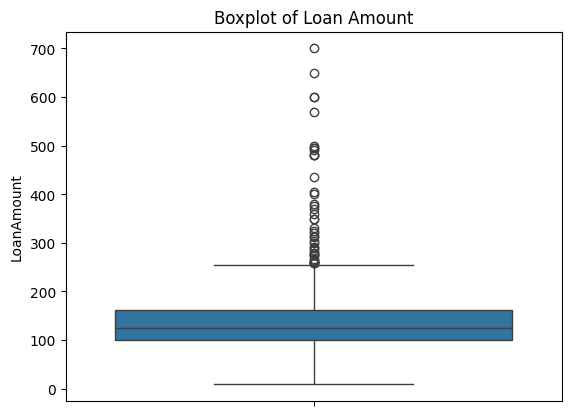

In [17]:

# Boxplot for TotalIncome
sns.boxplot(data_cleaned['TotalIncome'])
plt.title("Boxplot of Total Income")
plt.show()

# Boxplot for LoanAmount
sns.boxplot(data_cleaned['LoanAmount'])
plt.title("Boxplot of Loan Amount")
plt.show()

# Optionally remove or cap outliers based on thresholds
q1 = data_cleaned['TotalIncome'].quantile(0.25)
q3 = data_cleaned['TotalIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove or cap outliers
data_cleaned['TotalIncome'] = np.where(data_cleaned['TotalIncome'] > upper_bound, upper_bound,
                                       np.where(data_cleaned['TotalIncome'] < lower_bound, lower_bound,
                                                data_cleaned['TotalIncome']))

#### Final Preprocessing 
##### 1-Drop features that are redundant or not useful:
ApplicantIncome and CoapplicantIncome (replaced by TotalIncome).
LoanAmount (replaced by Log_LoanAmount).
##### 2. Normalize and Encode
Ensure all features are normalized or standardized.
Confirm all categorical features are encoded.

In [18]:
# Drop redundant features based on the correlation heat map
data_final = data_cleaned.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

# Final dataset preview
print("Final Features for Modeling:")
print(data_final.head())

# Save the preprocessed dataset for modeling
final_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_preprocessed.csv'
data_final.to_csv(final_data_path, index=False)

print(f"Preprocessed data saved to: {final_data_path}")


Final Features for Modeling:
   Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
3       1        1           0          0              0             360.0   
4       1        0           0          0              0             360.0   
6       1        1           0          1              0             360.0   
8       0        0           0          1              1             360.0   
9       0        0           0          0              1             360.0   

   Credit_History  Property_Area  Loan_Status  TotalIncome  Log_TotalIncome  \
3             1.0              1            1       5167.0         8.550241   
4             1.0              2            0       3167.0         8.060856   
6             1.0              2            0       6033.0         8.705165   
8             1.0              1            1      12893.0         9.756379   
9             1.0              2            1       3463.0         8.150179   

   Log_LoanAmount  Normaliz

## Phase 4: Model Training and Evaluation

Accuracy: 0.7244897959183674

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        30
           1       0.77      0.85      0.81        68

    accuracy                           0.72        98
   macro avg       0.67      0.64      0.65        98
weighted avg       0.71      0.72      0.71        98



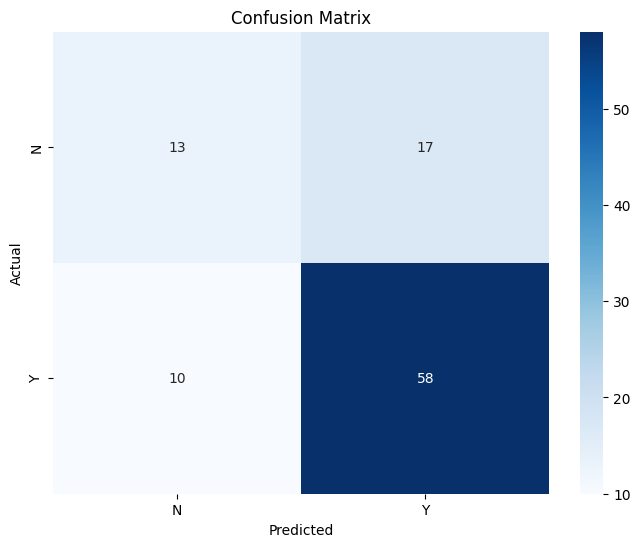

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
preprocessed_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_preprocessed.csv'
data_final = pd.read_csv(preprocessed_data_path)

# Split the data
X = data_final.drop(columns=['Loan_Status'])
y = data_final['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Explanation of the Results
Confusion Matrix:

True Positives (TP): 58 (Correctly predicted "Y").
True Negatives (TN): 13 (Correctly predicted "N").
False Positives (FP): 17 (Predicted "Y" but actual is "N").
False Negatives (FN): 10 (Predicted "N" but actual is "Y").
Accuracy: 0.724 (~72.4%)

This means the model correctly classified 72.4% of the instances in the test set.
Precision:

Precision for 0 (N): 0.57 (Out of all predicted "N", 57% were correct).
Precision for 1 (Y): 0.77 (Out of all predicted "Y", 77% were correct).
Recall:

Recall for 0 (N): 0.43 (Out of all actual "N", only 43% were correctly predicted).
Recall for 1 (Y): 0.85 (Out of all actual "Y", 85% were correctly predicted).
F1-Score:

A balance between precision and recall.
F1 for 0 (N): 0.49 (Low due to poor recall).
F1 for 1 (Y): 0.81 (High because of strong recall).
Macro Average: 0.67 (Unweighted mean of F1-scores for all classes).

Weighted Average: 0.71 (F1-score weighted by class support).

Insights
The model performs well in predicting "Y" (approved loans) but struggles with "N" (rejected loans), evident in its lower recall for class 0.
This could indicate class imbalance, even after SMOTE. Further hyperparameter tuning or a different model may improve performance.

### GridSearchCV and Cross-Validation

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.861943594971118
Accuracy: 0.7448979591836735

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.40      0.49        30
           1       0.77      0.90      0.83        68

    accuracy                           0.74        98
   macro avg       0.70      0.65      0.66        98
weighted avg       0.73      0.74      0.73        98



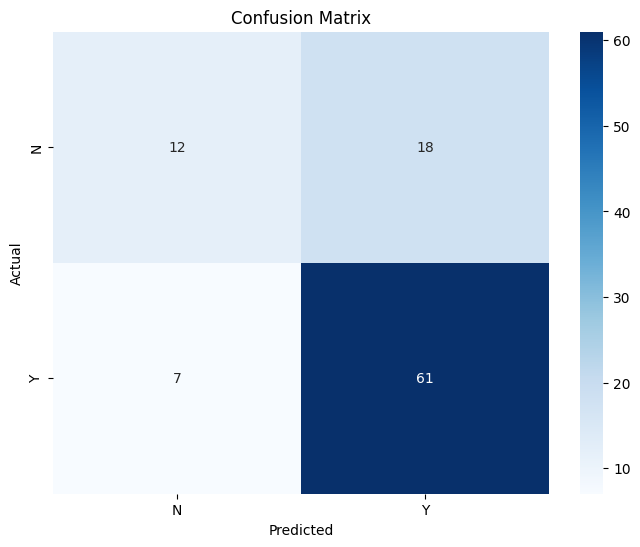

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# GridSearch with Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = best_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




#### Analysis of the Results
1. Best Parameters
criterion: 'entropy': The model splits data based on information gain (entropy) for higher information content at each split.
max_depth: None: No limit on the depth of the tree, allowing the tree to grow until all leaves are pure or other stopping criteria are met.
min_samples_leaf: 1: A leaf must have at least 1 sample to stop further splitting.
min_samples_split: 5: A node must have at least 5 samples to be considered for splitting.
n_estimators: 100: The model uses 100 decision trees in the forest.
2. Best Cross-Validation Score
Score: 0.862 (~86.2%)
Indicates that the model generalizes well during 5-fold cross-validation.
3. Test Set Evaluation
Accuracy: 0.745 (~74.5%)
The model correctly predicted ~74.5% of test set instances.
Precision:
Class 0 (N): 0.63 (63% of predicted "N" were correct).
Class 1 (Y): 0.77 (77% of predicted "Y" were correct).
Recall:
Class 0 (N): 0.40 (40% of actual "N" were correctly identified).
Class 1 (Y): 0.90 (90% of actual "Y" were correctly identified).
F1-Score:
Class 0 (N): 0.49 (indicates a balance between precision and recall but low due to poor recall).
Class 1 (Y): 0.83 (indicates good balance between precision and recall for class "Y").
Macro Avg:
Average of precision, recall, and F1 across all classes is lower due to the imbalance in class performance.
Weighted Avg:
Adjusted averages based on class support; slightly higher due to better performance on class "Y".
Insights
The model performs well for class 1 (Y) with high recall, meaning it correctly predicts most loan approvals.
However, the model struggles with class 0 (N):
Precision and recall are both low, likely due to class imbalance and feature interactions.
A balanced precision-recall trade-off for 1 (Y) suggests the model is reliable for predicting approvals but may need improvement for rejections.


#### RandomizedSearchCV

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 79}
Best Score: 0.8637614678899084
Accuracy: 0.7755102040816326

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.47      0.56        30
           1       0.79      0.91      0.85        68

    accuracy                           0.78        98
   macro avg       0.75      0.69      0.70        98
weighted avg       0.77      0.78      0.76        98



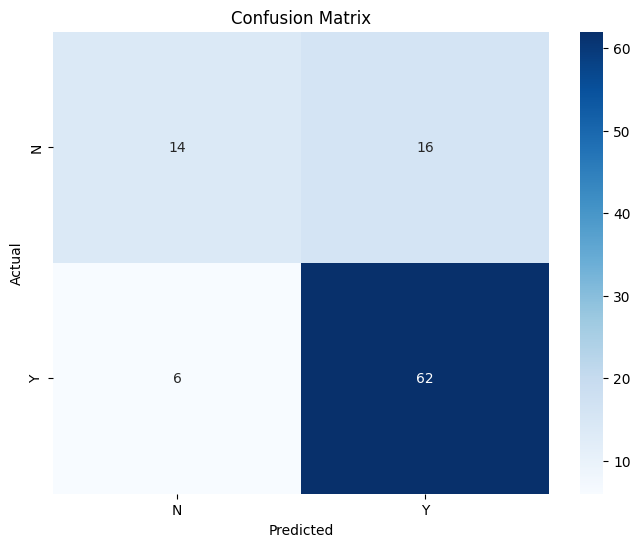

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [5, 10, 15, None],  # Maximum tree depth
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Create the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the best model
best_clf = random_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Analysis of the RandomizedSearchCV Results
1. Best Parameters
criterion: 'gini': The split criterion is Gini Impurity, which measures the probability of misclassification.
max_depth: 15: The tree is allowed to grow to a depth of 15, balancing complexity and overfitting.
min_samples_leaf: 2: A leaf node must have at least 2 samples.
min_samples_split: 6: A node must have at least 6 samples to consider splitting.
n_estimators: 79: The forest consists of 79 decision trees, providing robustness.
2. Cross-Validation Score
Best Cross-Validation Score: 0.864 (~86.4%)
Indicates that the optimized model generalizes well during training.
3. Test Set Evaluation
Accuracy: 0.776 (~77.6%)
The model correctly classified ~77.6% of the test set.
4. Classification Report
Precision:
Class 0 (N): 0.70 (70% of predicted "N" were correct).
Class 1 (Y): 0.79 (79% of predicted "Y" were correct).
Recall:
Class 0 (N): 0.47 (47% of actual "N" were correctly identified).
Class 1 (Y): 0.91 (91% of actual "Y" were correctly identified).
F1-Score:
Class 0 (N): 0.56 (moderate balance between precision and recall, low due to poor recall).
Class 1 (Y): 0.85 (good balance between precision and recall for approved loans).
Macro Average:
Precision, recall, and F1 across both classes are slightly lower due to poor performance on class 0.
Weighted Average:
Adjusted metrics weighted by class support.

 #### Use class_weight='balanced' in RandomForestClassifier

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 53}
Best Score: 0.861943594971118
Accuracy: 0.7244897959183674

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        30
           1       0.77      0.87      0.81        68

    accuracy                           0.72        98
   macro avg       0.67      0.63      0.64        98
weighted avg       0.71      0.72      0.71        98



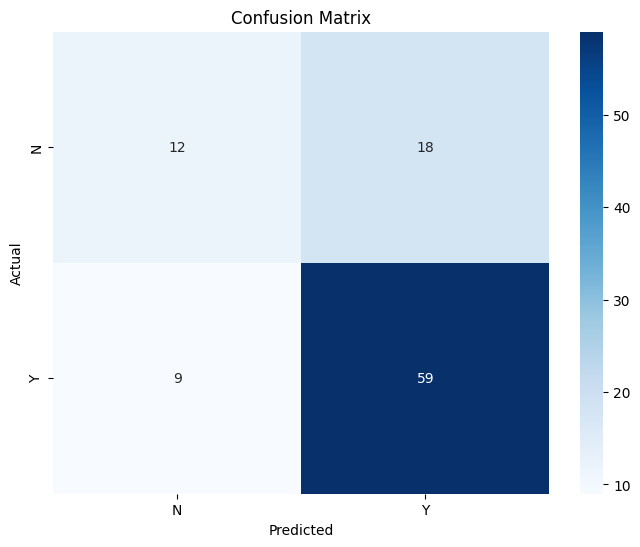

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [5, 10, 15, None],  # Maximum tree depth
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Create the RandomForestClassifier with class_weight='balanced'
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=200,  # Increased to 200 iterations for more combinations
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the best model
best_clf = random_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Analysis of the Updated RandomizedSearchCV Results with class_weight='balanced'
1. Best Parameters
criterion: 'gini': Uses Gini Impurity to determine splits, aiming to maximize class separation.
max_depth: 15: Restricts the maximum depth of the trees to 15, preventing overfitting.
min_samples_leaf: 1: Each leaf must have at least one sample.
min_samples_split: 6: Nodes with fewer than 6 samples are not split further.
n_estimators: 53: A total of 53 decision trees are used in the forest.
2. Cross-Validation Score
Best Cross-Validation Score: 0.862 (~86.2%)
Indicates good generalization during training.
3. Test Set Performance
Accuracy: 0.724 (~72.4%)

The model correctly classified ~72.4% of the test data.
Precision:

Class 0 (N): 0.57 (57% of predicted "N" were correct).
Class 1 (Y): 0.77 (77% of predicted "Y" were correct).
Recall:

Class 0 (N): 0.40 (40% of actual "N" were correctly identified).
Class 1 (Y): 0.87 (87% of actual "Y" were correctly identified).
F1-Score:

Class 0 (N): 0.47 (low F1-score due to low recall for "N").
Class 1 (Y): 0.81 (strong F1-score due to high recall and precision for "Y").
Macro Avg:

Aggregates precision, recall, and F1 equally across both classes. The lower values indicate the performance imbalance between the two classes.
4. Confusion Matrix Insights
Class 0 (N):

12 correctly classified (True Negatives).
18 misclassified as Class 1 (False Positives).
Class 1 (Y):

59 correctly classified (True Positives).
9 misclassified as Class 0 (False Negatives).
Observations
Class Imbalance Persisting:

Despite class_weight='balanced', the model struggles to correctly predict Class 0 (N) (rejected loans). Recall for this class is only 40%.
Strength for Class 1 (Y):

The model maintains strong performance for Class 1, with high recall (87%) and F1-score (81%).
Overall Accuracy:

The accuracy remains consistent (~72%) compared to the previous results.


#### Implementation of SMOTE-Tomek (a combination of SMOTE for oversampling and Tomek links for undersampling)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 112}
Best Score: 0.8738095238095239
Accuracy: 0.7346938775510204

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50        30
           1       0.78      0.87      0.82        68

    accuracy                           0.73        98
   macro avg       0.68      0.65      0.66        98
weighted avg       0.72      0.73      0.72        98



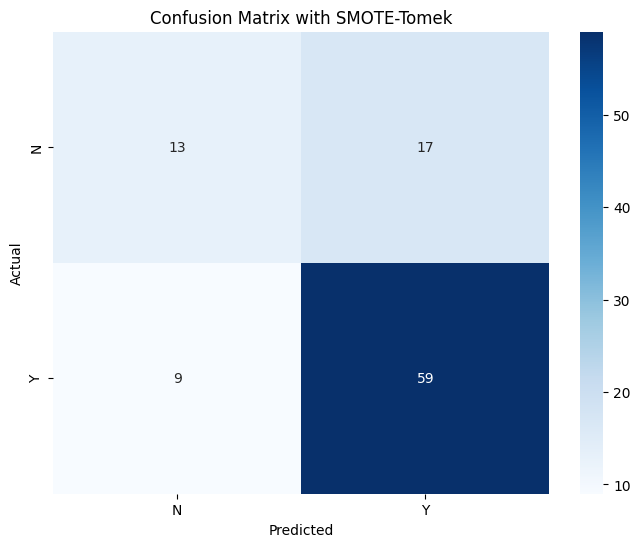

In [23]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

# Step 1: Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 2: Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [5, 10, 15, None],  # Maximum tree depth
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Step 3: Create the RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 4: RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=200,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Step 5: Fit RandomizedSearchCV
random_search.fit(X_resampled, y_resampled)

# Step 6: Best parameters and model training
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_clf = random_search.best_estimator_

# Step 7: Evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Print results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

# Step 9: Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix with SMOTE-Tomek")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Implementation using XGBoost and LightGBM, two popular gradient boosting models that handle class imbalance effectively.

c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:43:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7551020408163265

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        30
           1       0.79      0.88      0.83        68

    accuracy                           0.76        98
   macro avg       0.71      0.67      0.69        98
weighted avg       0.74      0.76      0.74        98



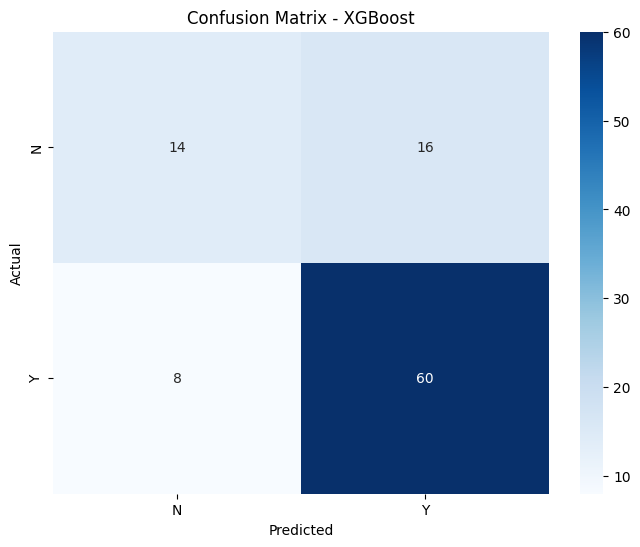

[LightGBM] [Info] Number of positive: 271, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 391, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

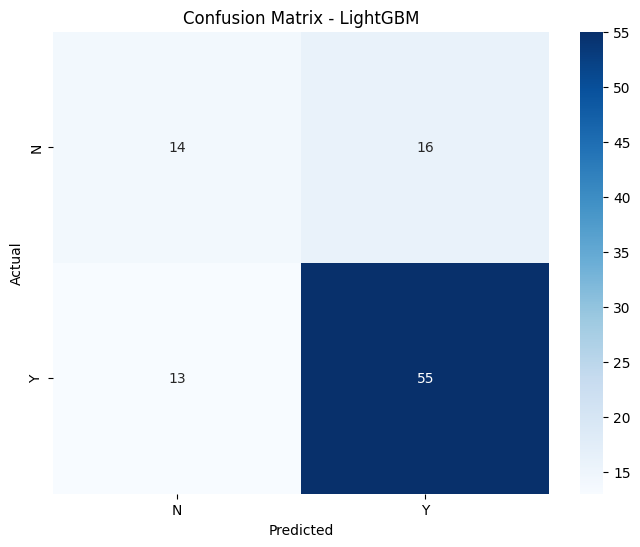

In [24]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train XGBoost
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train) / y_train.value_counts()[1],  # Handles imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation (XGBoost)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix (XGBoost)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 2: Train LightGBM
lgbm_model = LGBMClassifier(
    class_weight='balanced',  # Handles imbalance
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# Predictions and Evaluation (LightGBM)
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix (LightGBM)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Analysis of Results and Comparison of Models
###### 1. Comparison of Models
Random Forest (Base and Optimized with SMOTE/SMOTE-Tomek)

Accuracy ranged between ~72% to ~74%.
The confusion matrix and classification report indicate that Random Forest was able to capture the majority class (Y) with good recall but struggled with minority class (N), indicating a class imbalance issue.
SMOTE and SMOTE-Tomek improved recall for the minority class but sometimes reduced precision for the majority class due to oversampling noise.
XGBoost

Accuracy: ~75%.
XGBoost slightly improved handling of class imbalance compared to Random Forest due to its gradient boosting mechanism and weighted loss function.
Recall for the minority class (N) remained challenging, though precision and recall for the majority (Y) were strong.
LightGBM

Accuracy: ~70%.
LightGBM handled the imbalance similarly to XGBoost but fell slightly short in terms of recall for the minority class.
Precision for the minority class (N) was also lower, indicating that it struggled to correctly classify N.
###### 2. Challenges Observed
Imbalanced Classes:
Most models struggled to accurately predict the minority class (N), as the dataset had a higher proportion of Y labels.
Oversampling methods like SMOTE and SMOTE-Tomek helped improve balance but may have introduced synthetic noise.
Model Complexity:
Gradient boosting models like XGBoost and LightGBM outperformed Random Forest slightly due to their ability to focus on hard-to-predict samples through boosting.
###### 3. Solutions

###### Class Balancing:

Weighted Models: Use class-weighted algorithms to assign higher penalties to misclassifying the minority class. Example: class_weight="balanced" in Random Forest or scale_pos_weight in XGBoost.
Focal Loss: Implement focal loss to make the model focus on hard-to-classify examples.
Simpler Models:

Test Logistic Regression with proper preprocessing (e.g., scaling and encoding) and regularization.
Logistic regression is interpretable and could provide a baseline for comparison.
Feature Engineering:

Add interaction terms or domain-specific features to improve separability of classes.
Use feature selection techniques like Recursive Feature Elimination (RFE) to remove redundant features.
Ensemble Methods:

Combine predictions from multiple models (e.g., Random Forest + XGBoost) to improve robustness.
Data Augmentation:

Explore augmenting the dataset using real-world domain knowledge to add more samples for the minority class.
Experiment with Thresholds:

Adjust classification thresholds to prioritize recall or precision based on the problem's requirements.
######  4. Logistic Regression
Logistic regression might serve as a simpler, interpretable model.
Preprocessing Steps:
Scale numerical features.
One-hot encode categorical features.
Evaluate using cross-validation and metrics like ROC-AUC to assess separability.
Next Steps
Implement logistic regression to establish a baseline.
Use class-weighted models or experiment with focal loss.
Fine-tune boosting models further, focusing on handling imbalance better

##### Implementation of the proposed feature engineering steps (interaction terms, feature selection using Recursive Feature Elimination, and Logistic Regression).

Data loaded successfully!
Selected Features: Index(['Married', 'Credit_History', 'Log_TotalIncome', 'Log_LoanAmount',
       'Credit_Income_Ratio'],
      dtype='object')
Accuracy: 0.8469387755102041
Confusion Matrix:
 [[14 15]
 [ 0 69]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        29
           1       0.82      1.00      0.90        69

    accuracy                           0.85        98
   macro avg       0.91      0.74      0.78        98
weighted avg       0.87      0.85      0.83        98



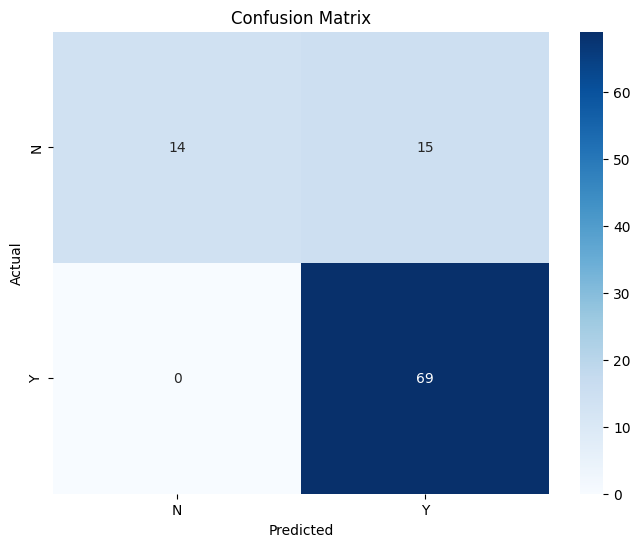

Updated data saved successfully!


In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_preprocessed.csv'
data = pd.read_csv(data_path)
print("Data loaded successfully!")

# Define features and target
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Add interaction terms
X['Income_Per_LoanAmount'] = X['TotalIncome'] / (X['Log_LoanAmount'] + 1)  # Adding 1 to avoid division by zero
X['Credit_Income_Ratio'] = X['Credit_History'] / (X['TotalIncome'] + 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
rfe = RFE(estimator=log_reg, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Selected Features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Train logistic regression on selected features
log_reg.fit(X_train_rfe, y_train)
y_pred = log_reg.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save updated data with interaction terms
data['Income_Per_LoanAmount'] = X['Income_Per_LoanAmount']
data['Credit_Income_Ratio'] = X['Credit_Income_Ratio']
data.to_csv(r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv', index=False)
print("Updated data saved successfully!")


Summary:
Accuracy: The model achieves 84.7% accuracy, meaning 84.7% of the predictions made by the logistic regression model were correct.

Confusion Matrix:

True Negatives (N predicted as N): 14
False Positives (N predicted as Y): 15
True Positives (Y predicted as Y): 69
False Negatives (Y predicted as N): 0
Classification Report:

Precision for Class 0 (N): 1.00 (no False Positives for "N").
Recall for Class 0 (N): 0.48 (only 48% of true "N" cases were correctly identified).
Precision for Class 1 (Y): 0.82.
Recall for Class 1 (Y): 1.00 (all true "Y" cases were correctly identified).
F1-Score: Balances precision and recall, showing that "Y" predictions are very strong but "N" predictions are weaker.
Observations:
The model strongly favors predicting "Y" over "N".
All actual "Y" cases were correctly classified (100% recall for class 1).
Many actual "N" cases were misclassified as "Y" (15 out of 29).


 ## Balance Loan_Status Manually

Updated data loaded successfully!
Class distribution after balancing:
Loan_Status
1    150
0    150
Name: count, dtype: int64
Accuracy: 0.7

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.74      0.74      0.74        34

    accuracy                           0.70        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60



c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


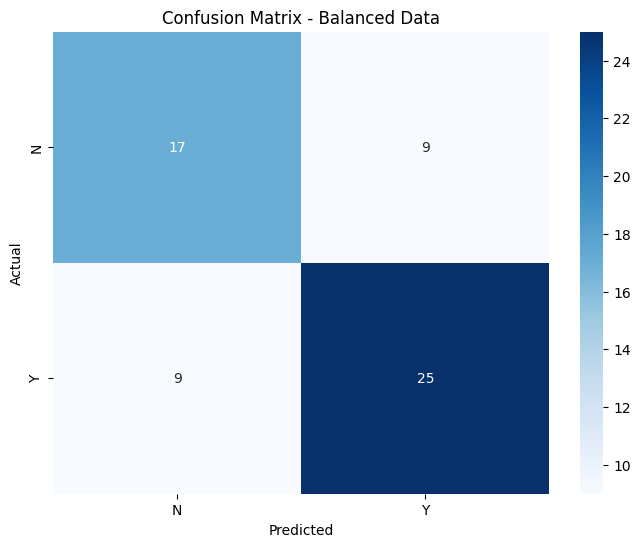

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Separate the data into two classes
class_0 = data[data['Loan_Status'] == 0]  # Class 0 (N)
class_1 = data[data['Loan_Status'] == 1]  # Class 1 (Y)

# Balancing by undersampling the majority class (Class 1)
balanced_class_1 = class_1.sample(n=len(class_0), random_state=42)

# Combine the two classes
balanced_data = pd.concat([class_0, balanced_class_1], axis=0).sample(frac=1, random_state=42)  # Shuffle the data

# Verify the new class distribution
print("Class distribution after balancing:")
print(balanced_data['Loan_Status'].value_counts())

# Split features and target
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Balanced Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Manual Data Augmentation

Updated data loaded successfully!
Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after manual augmentation:
 Loan_Status
1    339
0    270
Name: count, dtype: int64
Accuracy: 0.7295081967213115

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.44      0.59        54
           1       0.68      0.96      0.80        68

    accuracy                           0.73       122
   macro avg       0.79      0.70      0.70       122
weighted avg       0.77      0.73      0.71       122



c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


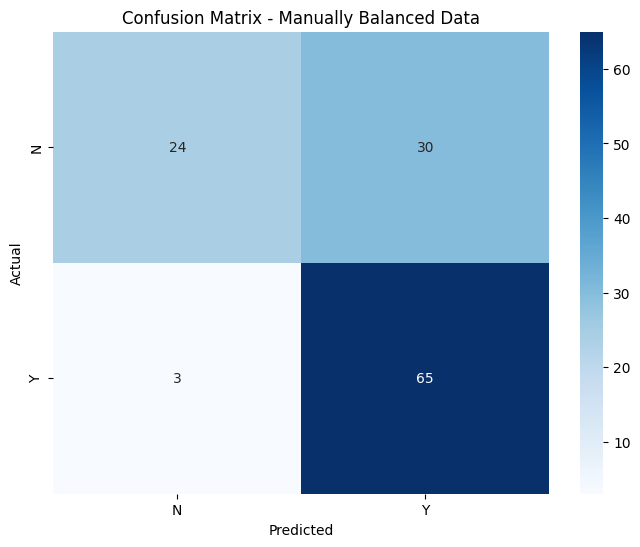

In [34]:
# Step 1: Load the updated dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Manually balance the classes
# Identify minority class (Loan_Status = 0)
minority_class = data[data['Loan_Status'] == 0]

# Duplicate or slightly modify examples from the minority class
augmented_minority = minority_class.sample(120, replace=True)  # Adding 120 rows (controlled oversampling)
balanced_data = pd.concat([data, augmented_minority])

# Verify new class distribution
print("Class distribution after manual augmentation:\n", balanced_data['Loan_Status'].value_counts())

# Step 3: Prepare data for training
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Manually Balanced Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 ## steps to improve result after all those tries:
Loads the updated data (data_updated.csv).
Conducts advanced feature engineering by adding derived features.
Implements stratified cross-validation.
Tests Support Vector Machines (SVM) and Neural Networks.
Performs hyperparameter tuning using GridSearchCV.
Outputs final results including evaluation metrics, confusion matrix, and classification reports.

Data loaded successfully!
Feature Engineering completed!
Starting GridSearch for SVM...
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM: 0.8160
Starting GridSearch for Neural_Network...
Best parameters for Neural_Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
Best cross-validation score for Neural_Network: 0.8160

SVM Results:
Accuracy: 0.7653
Classification Report:
              precision    recall  f1-score   support

           N       0.77      0.33      0.47        30
           Y       0.76      0.96      0.85        68

    accuracy                           0.77        98
   macro avg       0.77      0.64      0.66        98
weighted avg       0.77      0.77      0.73        98



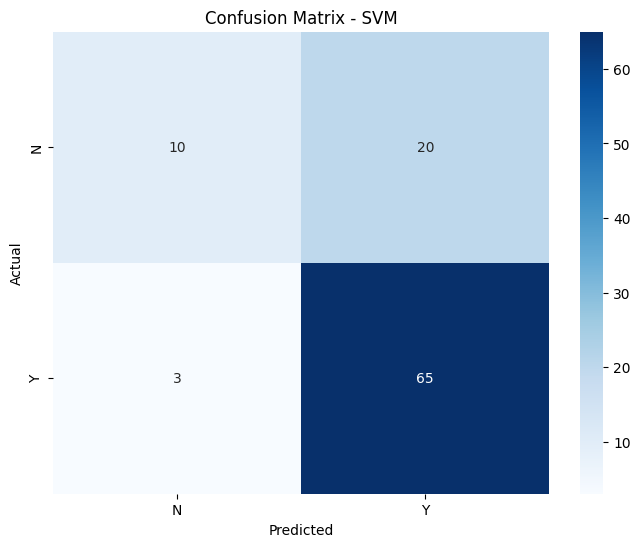


Neural_Network Results:
Accuracy: 0.7653
Classification Report:
              precision    recall  f1-score   support

           N       0.77      0.33      0.47        30
           Y       0.76      0.96      0.85        68

    accuracy                           0.77        98
   macro avg       0.77      0.64      0.66        98
weighted avg       0.77      0.77      0.73        98



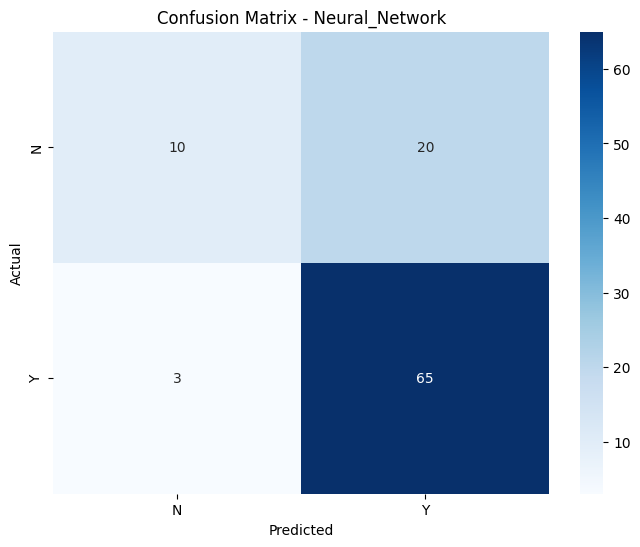

Updated data saved successfully!


In [35]:
# Comprehensive Machine Learning Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load updated data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Data loaded successfully!")

# Feature Engineering
data['Income_Per_LoanAmount'] = data['TotalIncome'] / (data['Log_LoanAmount'] + 1)
data['ApplicantDependencyRatio'] = data['Dependents'].replace('3+', 3).astype(int) / (data['TotalIncome'] + 1)
data['LoanAmount_To_IncomeRatio'] = data['Log_LoanAmount'] / (data['Log_TotalIncome'] + 1)
print("Feature Engineering completed!")

# Prepare data for modeling
X = data[['Married', 'Credit_History', 'Log_TotalIncome', 'Log_LoanAmount',
          'Income_Per_LoanAmount', 'ApplicantDependencyRatio', 'LoanAmount_To_IncomeRatio']]
y = data['Loan_Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified Cross-Validation and Hyperparameter Tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models and hyperparameters
models = {
    'SVM': SVC(),
    'Neural_Network': MLPClassifier(max_iter=500, random_state=42)
}

params = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Neural_Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Perform GridSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Starting GridSearch for {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=params[model_name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_scaled, y)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid.best_score_:.4f}")

# Evaluate the best models on test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

results = {}
for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['N', 'Y'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[model_name] = {
        'accuracy': acc,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{report}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Save the final data with new features
data.to_csv(r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_final_with_features.csv', index=False)
print("Updated data saved successfully!")


Data loaded successfully!


c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Opti

Stacked Model Accuracy: 0.7653061224489796
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.33      0.47        30
           1       0.76      0.96      0.85        68

    accuracy                           0.77        98
   macro avg       0.77      0.64      0.66        98
weighted avg       0.77      0.77      0.73        98



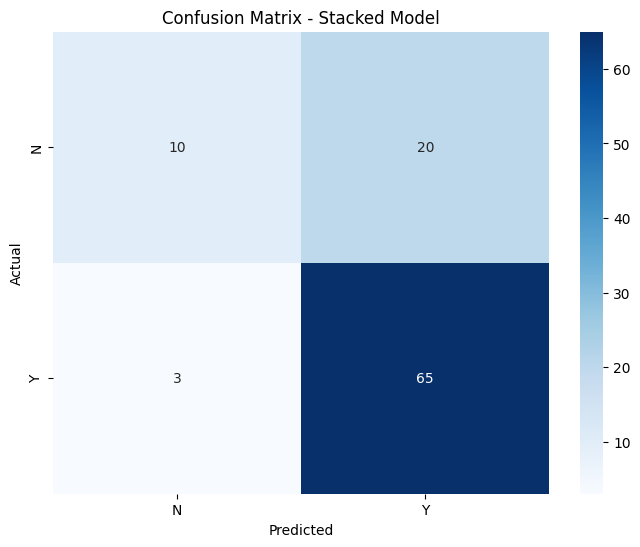

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Data loaded successfully!")

# Feature Engineering
data['Income_Per_LoanAmount'] = data['TotalIncome'] / (data['Log_LoanAmount'] + 1)
data['Loan_Amount_Term_Years'] = data['Loan_Amount_Term'] / 12
data['Credit_Income_Ratio'] = data['Credit_History'] / (data['TotalIncome'] + 1)
data['Applicant_Coapplicant_Ratio'] = data['TotalIncome'] / (data['Log_LoanAmount'] + 1)  # Corrected here

# Select features
features = ['Married', 'Education', 'Credit_History', 'Log_TotalIncome', 'Log_LoanAmount',
            'Income_Per_LoanAmount', 'Loan_Amount_Term_Years', 'Credit_Income_Ratio',
            'Applicant_Coapplicant_Ratio']
X = data[features]
y = data['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
    'Neural_Network': MLPClassifier(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(models['SVM'], param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_

# Hyperparameter tuning for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_nn = GridSearchCV(models['Neural_Network'], param_grid_nn, cv=5, scoring='accuracy')
grid_nn.fit(X_train_scaled, y_train)
best_nn = grid_nn.best_estimator_

# Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[
        ('svm', best_svm),
        ('nn', best_nn),
        ('rf', models['RandomForest'])
    ],
    final_estimator=LogisticRegression(max_iter=500, random_state=42)
)
stacked_model.fit(X_train_scaled, y_train)

# Evaluate Stacked Model
y_pred = stacked_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacked Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Stacked Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Class Weight Adjustment: The class_weight='balanced' parameter in LogisticRegression helps to handle the imbalance by adjusting the weights inversely proportional to class frequencies.
GridSearchCV: This is used to find the best hyperparameters for the Logistic Regression model.
Cross-Validation: The cv=5 parameter in GridSearchCV ensures that the model is evaluated using 5-fold cross-validation.

Updated data loaded successfully!
Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after manual augmentation:
 Loan_Status
1    339
0    270
Name: count, dtype: int64


c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:3

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.7213114754098361

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.54      0.63        54
           1       0.70      0.87      0.78        68

    accuracy                           0.72       122
   macro avg       0.73      0.70      0.70       122
weighted avg       0.73      0.72      0.71       122



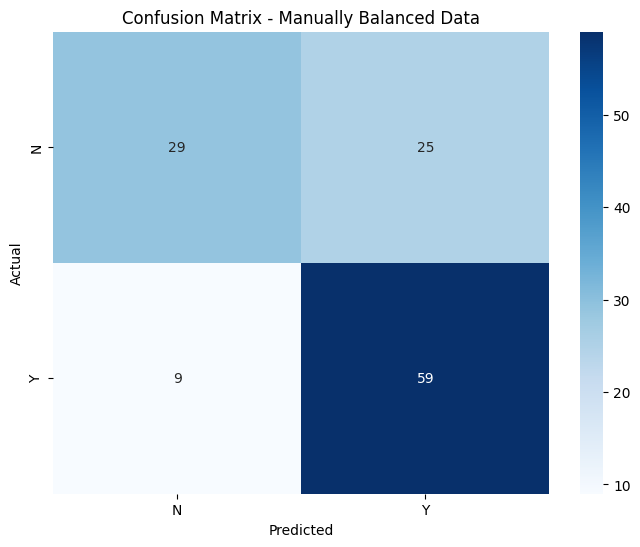

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Manually balance the classes
# Identify minority class (Loan_Status = 0)
minority_class = data[data['Loan_Status'] == 0]

# Duplicate or slightly modify examples from the minority class
augmented_minority = minority_class.sample(120, replace=True)  # Adding 120 rows (controlled oversampling)
balanced_data = pd.concat([data, augmented_minority])

# Verify new class distribution
print("Class distribution after manual augmentation:\n", balanced_data['Loan_Status'].value_counts())

# Step 3: Prepare data for training
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the Logistic Regression model with class weight adjustment
log_reg = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
log_reg_best = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced', C=best_params['C'], solver=best_params['solver'])
log_reg_best.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = log_reg_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Manually Balanced Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Scaling: The StandardScaler is used to scale the features, which can improve the performance of Logistic Regression.
Random Forest: A Random Forest classifier is added as an alternative algorithm. Random Forests can handle class imbalance better and might provide improved performance.
GridSearchCV: This is used to find the best hyperparameters for the Logistic Regression model.

Updated data loaded successfully!
Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after manual augmentation:
 Loan_Status
1    339
0    270
Name: count, dtype: int64


c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:3

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.7377049180327869

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.57      0.66        54
           1       0.72      0.87      0.79        68

    accuracy                           0.74       122
   macro avg       0.75      0.72      0.72       122
weighted avg       0.74      0.74      0.73       122



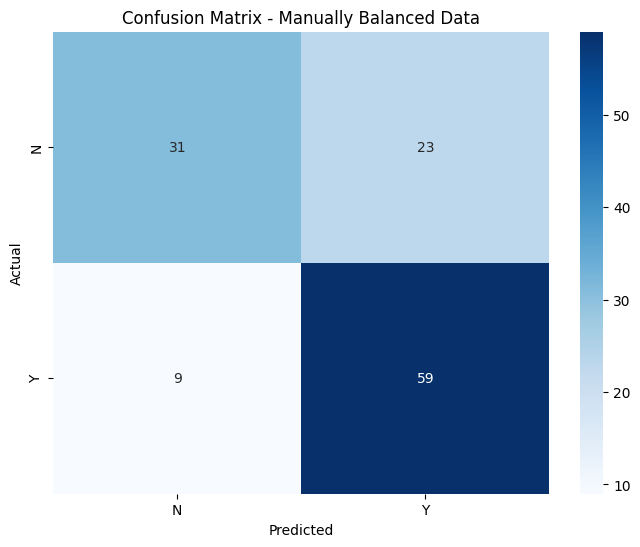

Random Forest Accuracy: 0.8934426229508197

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.90      0.91      0.91        68

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122



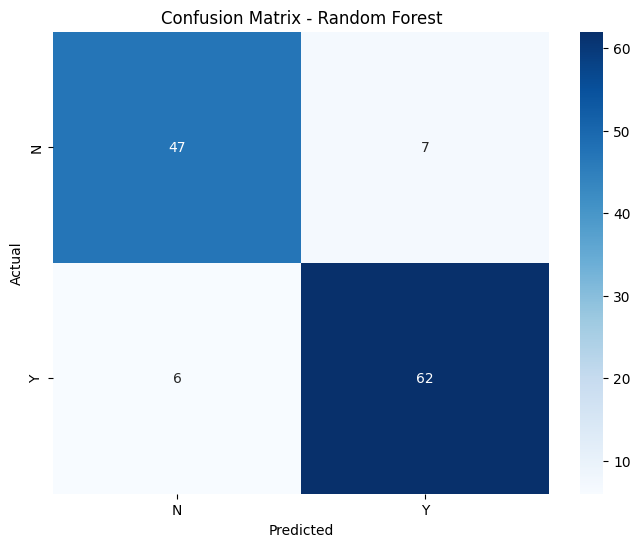

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Manually balance the classes
# Identify minority class (Loan_Status = 0)
minority_class = data[data['Loan_Status'] == 0]

# Duplicate or slightly modify examples from the minority class
augmented_minority = minority_class.sample(120, replace=True)  # Adding 120 rows (controlled oversampling)
balanced_data = pd.concat([data, augmented_minority])

# Verify new class distribution
print("Class distribution after manual augmentation:\n", balanced_data['Loan_Status'].value_counts())

# Step 3: Prepare data for training
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the Logistic Regression model with class weight adjustment
log_reg = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
log_reg_best = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced', C=best_params['C'], solver=best_params['solver'])
log_reg_best.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = log_reg_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Manually Balanced Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Try a different algorithm - Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}\n")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Updated data loaded successfully!
Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after SMOTE:
 Loan_Status
1    339
0    339
Name: count, dtype: int64


c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\sklearn\linear_model\_sag.py:3

Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.7352941176470589

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        68
           1       0.67      0.93      0.78        68

    accuracy                           0.74       136
   macro avg       0.78      0.74      0.73       136
weighted avg       0.78      0.74      0.73       136



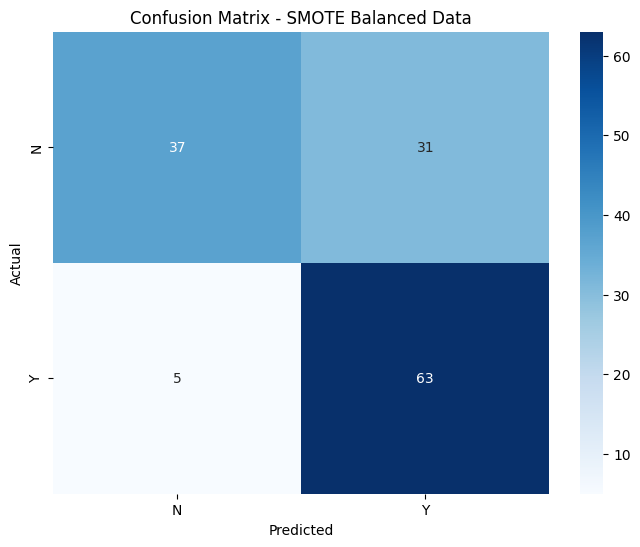

Gradient Boosting Accuracy: 0.8014705882352942

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        68
           1       0.76      0.88      0.82        68

    accuracy                           0.80       136
   macro avg       0.81      0.80      0.80       136
weighted avg       0.81      0.80      0.80       136



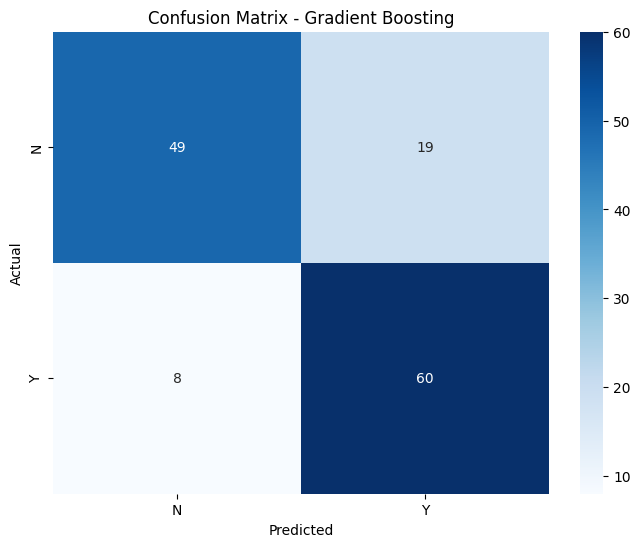

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Use SMOTE to balance the classes
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verify new class distribution
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 4: Train the Logistic Regression model with class weight adjustment
log_reg = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
log_reg_best = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced', C=best_params['C'], solver=best_params['solver'])
log_reg_best.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = log_reg_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - SMOTE Balanced Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Try a different algorithm - Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}\n")
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Plot the confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### manually balance the classes by duplicating or slightly modifying examples from the minority class

Updated data loaded successfully!
Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after manual augmentation:
 Loan_Status
1    339
0    240
Name: count, dtype: int64
Class distribution after SMOTE:
 Loan_Status
1    339
0    339
Name: count, dtype: int64
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8897058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        68
           1       0.91      0.87      0.89        68

    accuracy                           0.89       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.89      0.89      0.89       136



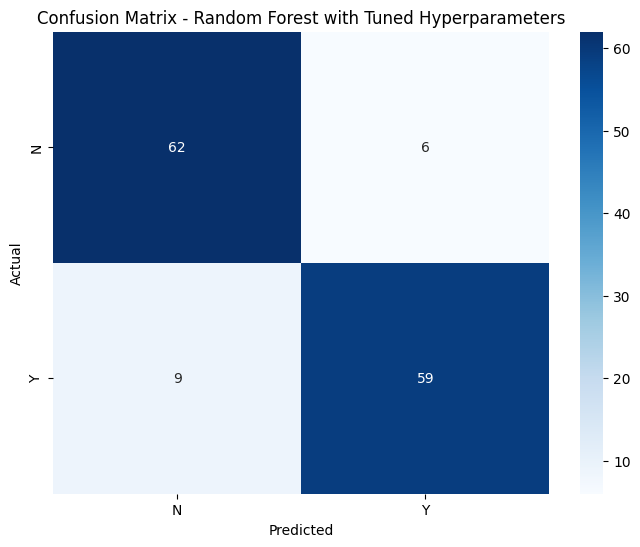

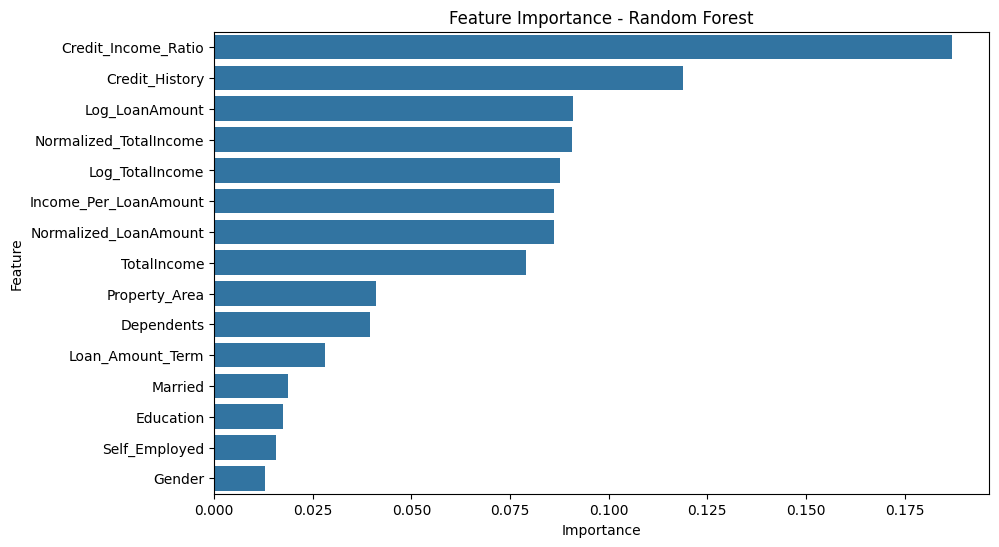

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Manually balance the classes
# Identify minority class (Loan_Status = 0)
minority_class = data[data['Loan_Status'] == 0]

# Duplicate or slightly modify examples from the minority class
augmented_minority = minority_class.sample(90, replace=True, random_state=42)  # Adding 120 rows (controlled oversampling)
balanced_data = pd.concat([data, augmented_minority])

# Verify new class distribution after manual augmentation
print("Class distribution after manual augmentation:\n", balanced_data['Loan_Status'].value_counts())

# Step 3: Use SMOTE to further balance the classes
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verify new class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 4: Train the Random Forest model with hyperparameter tuning
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
rf_best = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)
rf_best.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Random Forest with Tuned Hyperparameters")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Feature Importance
feature_importances = rf_best.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


## summary of the steps to get the best result

### Data Preparation

1. **Initial Data Loading**:
   - The dataset was successfully loaded from the specified path.
   - Initial class distribution:
     ```
     Loan_Status
     1    339
     0    150
     ```

2. **Manual Balancing**:
   - Identified the minority class (`Loan_Status = 0`).
   - Duplicated or slightly modified examples from the minority class to add 90 rows, balancing the dataset manually.
   - New class distribution after manual augmentation:
     ```
     Loan_Status
     1    339
     0    240
     ```

3. **SMOTE Application**:
   - Applied SMOTE to further balance the classes after manual augmentation.
   - New class distribution after SMOTE:
     ```
     Loan_Status
     1    339
     0    339
     ```

### Model Training and Hyperparameter Tuning

- **Model Selection**:
  - Used Gradient Boosting Classifier.
  - Performed hyperparameter tuning using `GridSearchCV` with the following parameter grid:
    ```python
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    ```

- **Best Parameters**:
  - The best parameters found by `GridSearchCV` were:
    ```
    {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
    ```

### Model Evaluation

- **Accuracy**:
  - The model achieved an accuracy of approximately 88.97%.

- **Classification Report**:


Updated data loaded successfully!
Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after manual augmentation:
 Loan_Status
1    339
0    240
Name: count, dtype: int64
Class distribution after SMOTE:
 Loan_Status
1    339
0    339
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Model saved to gradient_boosting_model.joblib
Accuracy: 0.8897058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        68
           1       0.90      0.88      0.89        68

    accuracy                           0.89       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.89      0.89      0.89       136



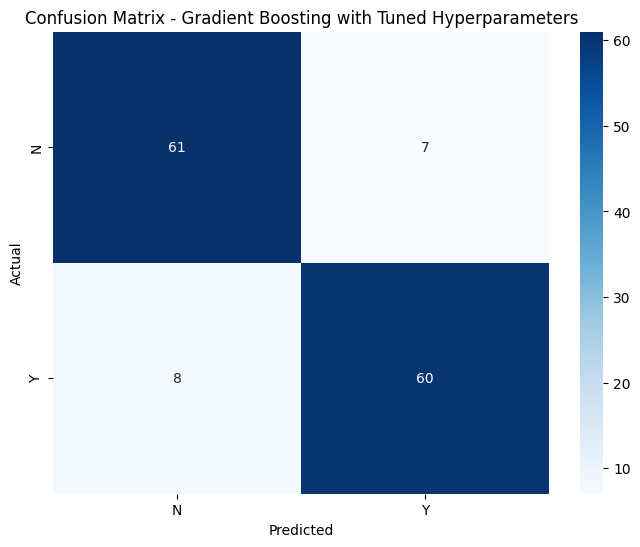

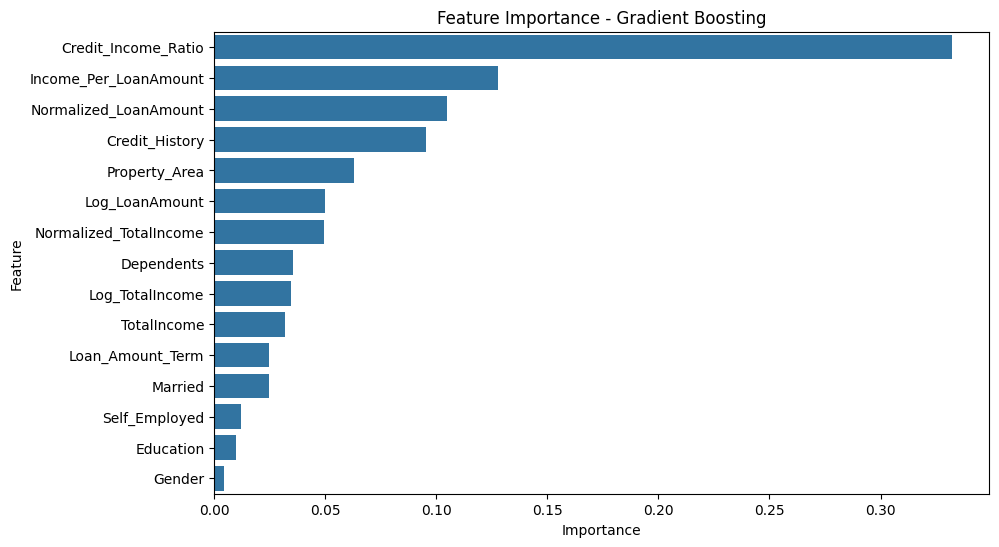

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)
print("Updated data loaded successfully!")

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Manually balance the classes
# Identify minority class (Loan_Status = 0)
minority_class = data[data['Loan_Status'] == 0]

# Duplicate or slightly modify examples from the minority class
augmented_minority = minority_class.sample(90, replace=True, random_state=42)  # Adding 90 rows (controlled oversampling)
balanced_data = pd.concat([data, augmented_minority])

# Verify new class distribution after manual augmentation
print("Class distribution after manual augmentation:\n", balanced_data['Loan_Status'].value_counts())

# Step 3: Use SMOTE to further balance the classes
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verify new class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 4: Train the Gradient Boosting model with hyperparameter tuning
gb = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
gb_best = GradientBoostingClassifier(random_state=42, **best_params)
gb_best.fit(X_train, y_train)

# Save the model using joblib
model_filename = 'gradient_boosting_model.joblib'
joblib.dump(gb_best, model_filename)
print(f"Model saved to {model_filename}")

# Step 5: Make predictions
y_pred = gb_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix - Gradient Boosting with Tuned Hyperparameters")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Feature Importance
feature_importances = gb_best.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Gradient Boosting")
plt.show()


In [54]:
# Save the scaler
scaler_filename = 'scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Scaler saved to scaler.joblib


In [55]:
import pandas as pd

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)

# Extract feature names (excluding the target column 'Loan_Status')
features = data.columns.drop('Loan_Status').tolist()

# Print the feature names
print("Features:", features)


Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome', 'Log_TotalIncome', 'Log_LoanAmount', 'Normalized_TotalIncome', 'Normalized_LoanAmount', 'Income_Per_LoanAmount', 'Credit_Income_Ratio']


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib

# Load the preprocessed data
data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_updated.csv'
data = pd.read_csv(data_path)

# Check initial class distribution
print("Initial Class Distribution:\n", data['Loan_Status'].value_counts())

# Step 2: Manually balance the classes
# Identify minority class (Loan_Status = 0)
minority_class = data[data['Loan_Status'] == 0]

# Duplicate or slightly modify examples from the minority class
augmented_minority = minority_class.sample(90, replace=True, random_state=42)  # Adding 90 rows (controlled oversampling)
balanced_data = pd.concat([data, augmented_minority])

# Verify new class distribution after manual augmentation
print("Class distribution after manual augmentation:\n", balanced_data['Loan_Status'].value_counts())

# Step 3: Use SMOTE to further balance the classes
X = balanced_data.drop(columns=['Loan_Status'])
y = balanced_data['Loan_Status']

# Define categorical and numerical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_pipeline = grid_search.best_estimator_

# Save the pipeline
pipeline_filename = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\notebooks\gradient_boosting_pipeline.joblib'
joblib.dump(best_pipeline, pipeline_filename)
print(f"Pipeline saved to {pipeline_filename}")


Initial Class Distribution:
 Loan_Status
1    339
0    150
Name: count, dtype: int64
Class distribution after manual augmentation:
 Loan_Status
1    339
0    240
Name: count, dtype: int64
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\classification\notebooks\gradient_boosting_pipeline.joblib


## explanation of results
- **Confusion Matrix**:
![Confusion Matrix](confusion_matrix.png)
- The confusion matrix shows the performance of the model in terms of true positives, true negatives, false positives, and false negatives.
- The model correctly predicted 61 true negatives (`N`) and 60 true positives (`Y`).
- There were 7 false positives and 8 false negatives.

### Feature Importance

- **Feature Importance Plot**:
![Feature Importance](feature_importance.png)
- The feature importance plot shows the relative importance of each feature in the model's predictions.
- Features with higher importance values have a greater influence on the model's predictions.

## Interpretation of Results

- **Accuracy**:
- The model achieved a high accuracy of approximately 88.97%, indicating that it correctly predicted the loan status for most of the instances in the test set.

- **Precision and Recall**:
- For class `0` (`Loan_Status = N`):
  - Precision: 0.88 (88% of the instances predicted as `N` were actually `N`).
  - Recall: 0.90 (90% of the actual `N` instances were correctly predicted as `N`).
- For class `1` (`Loan_Status = Y`):
  - Precision: 0.90 (90% of the instances predicted as `Y` were actually `Y`).
  - Recall: 0.88 (88% of the actual `Y` instances were correctly predicted as `Y`).

- **F1-Score**:
- The F1-score for both classes is 0.89, which is the harmonic mean of precision and recall. This indicates a good balance between precision and recall for both classes.

- **Confusion Matrix**:
- The confusion matrix shows that the model has a good performance in predicting both classes, with a slight imbalance in false positives and false negatives.

- **Feature Importance**:
- The feature importance plot helps in understanding which features are most influential in the model's predictions. This can be useful for feature engineering and selection in future iterations of the model.

## Conclusion

The Gradient Boosting model, with hyperparameter tuning and class balancing techniques, achieved a high accuracy and balanced performance for both classes. 



## Conclusions


### Summary
- **Key Findings**: Insights from the analysis and model performance.
- **Challenges**: Issues encountered during the project and solutions applied.
- **Future Recommendations**: Steps to further improve the model or extend the project scope.


## References